## Постановка задачи

Как и любой бизнес, компания «Мегафон» хочет повысить удовлетворённость своих клиентов качеством услуг. Это важная задача для удержания пользователей — как давних, так и недавно привлечённых. Ведь затраты на маркетинг и продвижение не оправдаются, если клиент уйдёт из-за низкого качества связи. Однако в реальном мире ресурсы всегда ограничены, и в единицу времени технический отдел может решить конечное количество задач. <br>
Чтобы делать это наиболее эффективно, важно определить, какие технические показатели качества связи сильнее всего влияют на удовлетворённость клиентов, и в первую очередь направить ресурсы на работу с ними. Для этого «Мегафон» провёл опрос своих клиентов, предложив им оценить уровень удовлетворённости качеством связи. По каждому клиенту, прошедшему опрос, были собраны технические показатели. <br>
Подготовьте исследование для компании «Мегафон» и проанализируйте, как зависит (и зависит ли) оценка, которую ставит клиент в опросе, от технических показателей, которые были собраны. <br><br><br>

**Более подробно о проведённом опросе:**

В ходе опроса компания «Мегафон» предложила своим клиентам оценить уровень удовлетворённости качеством связи по десятибалльной шкале (где 10 — это «отлично», а 1 — «ужасно»). Если клиент оценивал качество связи на 9 или 10 баллов, опрос заканчивался. Если клиент ставил оценку ниже 9, задавался второй вопрос — о причинах неудовлетворённости качеством связи с предоставленными пронумерованными вариантами ответа. Ответ можно было дать в свободном формате или перечислить номера ответов через запятую. Ниже вы можете ознакомиться с инфографикой по структуре опроса.<br>

*Обратите, пожалуйста, внимание, что для работы вам даны реальные данные, что может повлечь необходимость в дополнительной их обработке.*

![](https://sun9-32.userapi.com/C6vN5pHQW7hlseIt0AtTN7qNDQbDnHXdt1P2NA/ILntXqa-RrA.jpg)

## Codebook

`megafon.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `user_id` — идентификатор абонента;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q1` — ответ на первый вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q2` — ответ на второй вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Total Traffic(MB)` — объем трафика передачи данных <sup>1 </sup>; <br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink Throughput(Kbps)` — средняя скорость «к абоненту» <sup>2 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Uplink Throughput(Kbps)`— средняя скорость «от абонента» <sup>3 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink TCP Retransmission Rate(%)` — частота переотправок пакетов «к абоненту» <sup>4 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming Download Throughput(Kbps)` — скорость загрузки потокового видео <sup>5 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming xKB Start Delay(ms)` — задержка старта воспроизведения видео <sup>6 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Page Download Throughput(Kbps)` — скорость загрузки web-страниц через браузер <sup>7 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Average TCP RTT(ms)` — пинг при просмотре web-страниц<sup>8 </sup>.<br>


<sup>1 </sup> — Насколько активно абонент использует мобильный интернет.<br>
<sup>2 </sup> — Считается по всему трафику передачи данных.<br>
<sup>3 </sup> — Считается по всему трафику передачи данных.<br>
<sup>4 </sup> — Чем выше, тем хуже. Если в канале возникает ошибка, пакет переотправляется. Снижается полезная скорость.<br>
<sup>5 </sup> — Чем выше, тем лучше — меньше прерываний и лучше качество картинки.<br>
<sup>6 </sup> — Сколько времени пройдёт между нажатием на кнопку Play и началом воспроизведения видео. Чем меньше это время, тем быстрее начинается воспроизведение.<br>
<sup>7 </sup> — Чем выше, тем лучше.<br>
<sup>8 </sup> — Чем меньше, тем лучше — быстрее загружаются web-страницы.<br>

Первый технический показатель представлен как сумма за период в одну неделю перед участием в опросе. Остальные технические показатели отображают среднее значение по данному признаку за период в одну неделю перед участием в опросе.

In [23]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as exp
import warnings
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats
from tqdm.auto import tqdm
from scipy.stats import norm
%matplotlib inline

# Установим режим игнорирования для предупреждений
warnings.filterwarnings("ignore")


## 1 Анализ значений скорости интернета "к абоненту".

### 1.1 Постановка задачи

Одним из основных критериев качества связи для клиента является скорость интернет соединения. С помощью имеющихся данных определим, являются ли данные о скорости передачи данных определяющим фактором для предположения о степени удовлетворения услугами клиентами.
Проведем исследование о статистическом различии на примере метрики скорости передачи данных "к абоненту" - **"Downlink Throughput(Kbps)"**

Ответ на данный вопрос поможет выявить зоны плохого интернет соединения и провести соответствующие мероприятия для улучшения качества связи на данной территории.

### 1.2 Разведочный анализ данных

In [24]:
# Загрузим данные
data = pd.read_csv('megafon.csv')
data.head()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68


In [25]:
# Обзор данных на предмет пропусков и типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3112 non-null   int64  
 1   Q1                                         3110 non-null   object 
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3112 non-null   float64
 4   Downlink Throughput(Kbps)                  3112 non-null   float64
 5   Uplink Throughput(Kbps)                    3112 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3112 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3112 non-null   float64
 10  Web Average TCP RTT(ms) 

Наибольшее количество пропусков наблюдается в столбце с ответами на второй вопрос. Как видно из даных на него отвечают не все абоненты, ответившие неудовлетворительно на 1 вопрос.

Для начала преобразуем данные таким образом, чтобы имелась возможность разделить данные на две группы абонентов, для обнаружения статистически значимых различий в метриках между ними.

In [26]:
# Проверим соответствие ответа нашему перечню идентификаторов, 
# Если нет, то ставим пометку 'none_format'
data['Q1'] = data['Q1'].apply(lambda x: int(x) if any(item == str(x) for item in [str(i) for i in range(1,11)]) else 'none_format')

# Отфильтруем значения 'none_format'
data = data[data['Q1']!='none_format']

# Установим необходимый тип данных для ответов
data['Q1'] = data['Q1'].astype('int')

# Создадим признак принадлежности клиентов к каждой из групп
# Будем считать довольных клиентов группой 1, недовольных группой 2
data['group'] = data['Q1'].apply(lambda x: 2 if x < 9 else 1).astype('int')
data.reset_index(inplace=True)
data.head()

,index,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),group
0,0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83,2
1,1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,2
2,2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,2
3,3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,2
4,4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,2


Отобразим распределение ответов на первый вопрос.

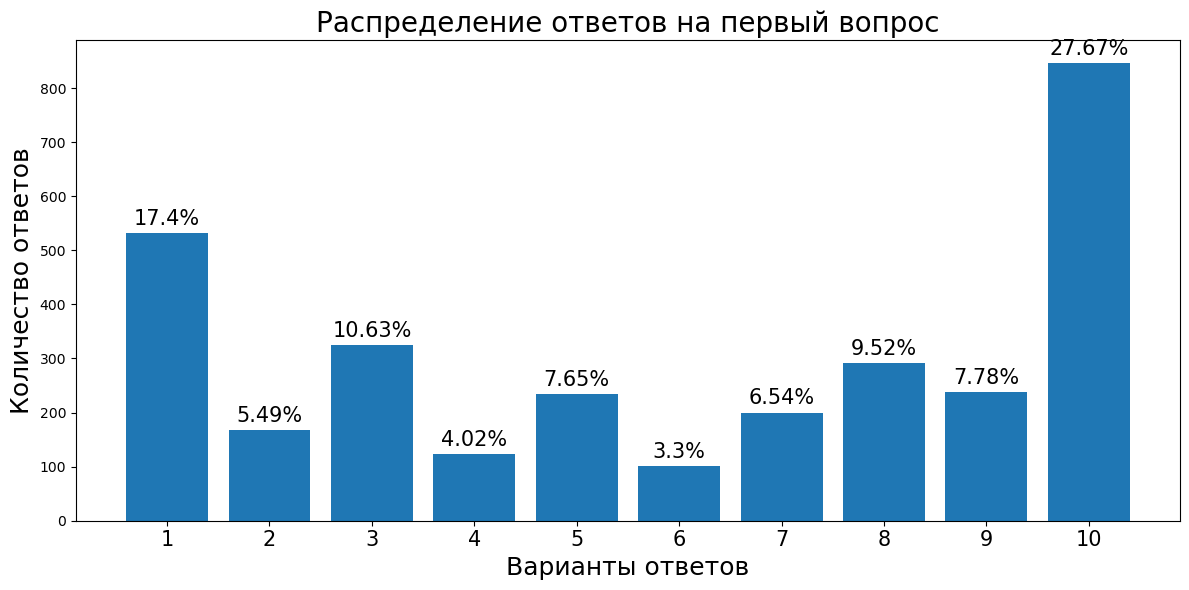

In [28]:
# Группируем данные по столбцу с ответами на первый вопрос
count_data = data.groupby('Q1').count()['user_id']

# Создадим список подписей с процентным соотношением количества данных ответов
labels_percents = [str(round(item/len(data)*100,2))+'%' for index, item in enumerate(count_data)]

# Отобразим распределение
def label(bars):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.annotate('{}'.format(labels_percents[i]),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=15)

width = 0.35
x = np.arange(len(count_data.index))
labels = labels_percents
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,6))
bars = ax.bar(count_data.index, count_data.values)

ax.set_xticklabels(count_data.index, fontsize=15)
ax.set_xticks(count_data.index)
ax.set_xticklabels(count_data.index, fontsize=15)

plt.title('Распределение ответов на первый вопрос', fontsize=20)
plt.xlabel('Варианты ответов', fontsize=18)
plt.ylabel('Количество ответов', fontsize=18)

label(bars)        

fig.tight_layout()
plt.show()

Градации в ответах по убыванию или возрастанию не наблюдается.\
Самыми частыми ответами на первый вопрос являются ответы 10 и 1.
Далее по частоте встречаемости идут ответы 3, 8 и 9.\
Такое распределение говорит об особенностях человека в объективной оценке качества связи.

Отобразим соотношение групп абонентов в виде курговой диаграммы для наглядного представления разницы долей.

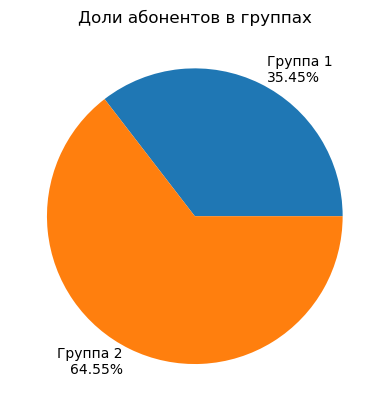

<Figure size 640x480 with 0 Axes>

In [29]:
# Группируем данные по столбцу с типом группы абонентов
count_data = data.groupby('group').count()['user_id']

# Создадим список подписей с процентным соотношением количества данных абонентов
labels_percents = [
    'Группа ' + str(count_data.index[index]) + '\n' + str(round(item / len(data) * 100, 2)) + '%'
    for index, item in enumerate(count_data)
]

# Отобразим рапределение
plt.pie(count_data, labels = labels_percents, radius = 1)
plt.title('Доли абонентов в группах')
plt.show()


Количество клиентов, недовольных качеством связи больше довольных почти в 2 раза. Это связано с тем, что оценку качеству связи дают преимущественно недовольные клиенты, в то время как довольные предпочитают вовсе не учавствовать в данном опросе. Иными словами выборка является смещённой.

Посмотрим на наличие зависимостей метрик качества связи.

In [30]:
# Напишем функцию возвращающую значения корреляции между метриками выше установленного фильтра

def data_corr(data, metrics, filter = 0.2):
    data_corr = data.corr()
    corr_list = data_corr[((data_corr > filter) | (data_corr < -filter)) & (data_corr < 1)][metrics].dropna()
    return corr_list

In [31]:
data_corr(data, 'Downlink Throughput(Kbps)')

Video Streaming Download Throughput(Kbps)    0.576065
Video Streaming xKB Start Delay(ms)         -0.225456
Web Page Download Throughput(Kbps)           0.266168
Name: Downlink Throughput(Kbps), dtype: float64

In [32]:
data.corr()

,index,user_id,Q1,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),group
index,1.000000,1.000000,0.003759,-0.002434,0.005629,-0.003396,-0.033186,-0.009411,-0.019838,-0.005669,0.034608,-0.016431
user_id,1.000000,1.000000,0.003759,-0.002434,0.005629,-0.003396,-0.033186,-0.009411,-0.019838,-0.005669,0.034608,-0.016431
Q1,0.003759,0.003759,1.000000,-0.006246,0.088240,0.067721,-0.093386,0.108803,-0.100187,0.083663,-0.117002,-0.802400
Total Traffic(MB),-0.002434,-0.002434,-0.006246,1.000000,0.142469,0.018312,-0.092062,0.038646,-0.049636,0.028740,-0.074521,0.015387
Downlink Throughput(Kbps),0.005629,0.005629,0.088240,0.142469,1.000000,0.156120,-0.192326,0.576065,-0.225456,0.266168,-0.189598,-0.081923
Uplink Throughput(Kbps),-0.003396,-0.003396,0.067721,0.018312,0.156120,1.000000,-0.099840,0.170372,-0.080932,0.121661,-0.142160,-0.042757
Downlink TCP Retransmission Rate(%),-0.033186,-0.033186,-0.093386,-0.092062,-0.192326,-0.099840,1.000000,-0.241937,0.193828,-0.193402,0.133720,0.065774
Video Streaming Download Throughput(Kbps),-0.009411,-0.009411,0.108803,0.038646,0.576065,0.170372,-0.241937,1.000000,-0.367639,0.386492,-0.256265,-0.081754
Video Streaming xKB Start Delay(ms),-0.019838,-0.019838,-0.100187,-0.049636,-0.225456,-0.080932,0.193828,-0.367639,1.000000,-0.174785,0.232962,0.089933
Web Page Download Throughput(Kbps),-0.005669,-0.005669,0.083663,0.028740,0.266168,0.121661,-0.193402,0.386492,-0.174785,1.000000,-0.225465,-0.070189


Значение метрики **"Downlink Throughput(Kbps)"** хорошо коррелирует с метрикой скорости загрузки потокового видео.

Отобразим значения данной метрики на диаграмме boxplot для визуального сравнения распределений в двух группах.

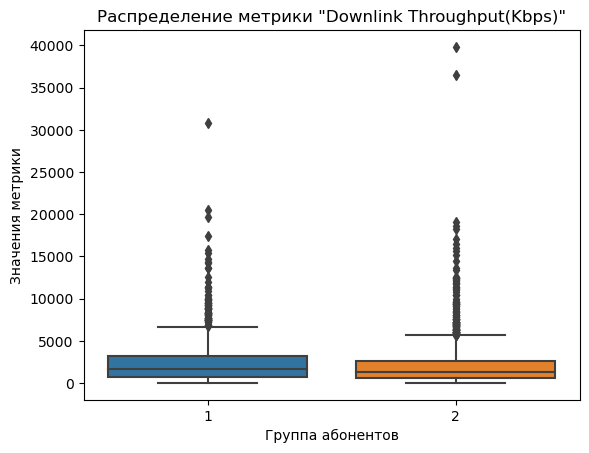

In [33]:
sns.boxplot(x='group', y='Downlink Throughput(Kbps)', data=data)
plt.title('Распределение метрики "Downlink Throughput(Kbps)"')
plt.xlabel('Группа абонентов')
plt.ylabel('Значения метрики')
plt.show()

На графике видно множество выбросов, поэтому применим правило трех сигм, так как некоторые значения выбросов на порядок больше значений в межквартильном интервале. Хотя из-за смещенности данных, значения выбросов могут ими и не являться.

In [34]:
# Функция для фильтрации данных методом трех сигм

def three_sigm(df, columns):
    for column in columns:
        sd = df[column].std()
        upper_level = df[column].mean() + 3 * df[column].std()
        lower_level = df[column].mean() - 3 * df[column].std()
        df[column] = df[(df[column] < upper_level) & (df[column] > lower_level)][column]
    return df

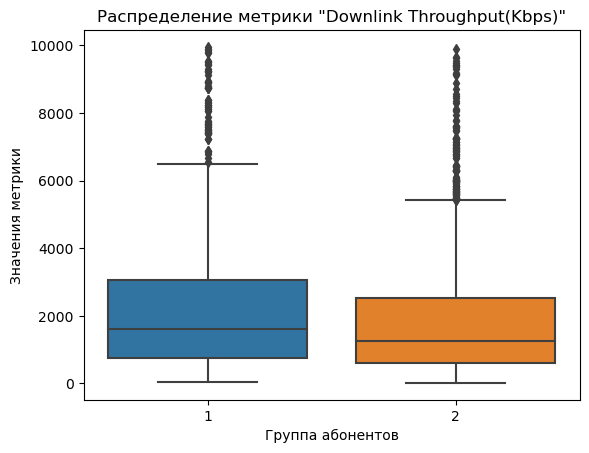

In [35]:
sns.boxplot(x='group', y='Downlink Throughput(Kbps)', data = three_sigm(data, ['Downlink Throughput(Kbps)']))
plt.title('Распределение метрики "Downlink Throughput(Kbps)"')
plt.xlabel('Группа абонентов')
plt.ylabel('Значения метрики')
plt.show()

На таком графике сложно уверенно утверждать о наличии статистического значимого различия из-за большого количества аномалий даже после применения правила трех сигм.

Посмотрим на гистограммы двух этих распределений.

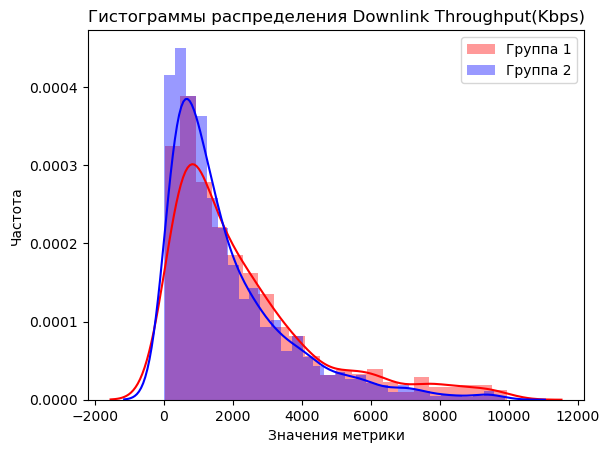

In [36]:
sns.distplot(data[data['group']==1]['Downlink Throughput(Kbps)'], color='red', label='Группа 1')
sns.distplot(data[data['group']==2]['Downlink Throughput(Kbps)'], color='blue', label='Группа 2')
plt.legend()
plt.title('Гистограммы распределения Downlink Throughput(Kbps)')
plt.xlabel('Значения метрики')
plt.ylabel('Частота')
plt.show()

Гистограммы представляют собой ненормальное распределение. \
Распределение группы 2 имеет большие значения на малых скоростях передачи данных. \
В то же время показатели высокой скорости передачи данных у второй группы встречаются реже. Очевидно что скорость передачи данных для группы 1 в среднем ниже чем у группы 2. Проверим это утверждение с помощью статистики.

### 1.3 Статистический тест

Для проведения статистического теста определим 2 гипотезы:
 - **H0**: Скорость не оказывает влияния на удовлетворенность абонента сотовой связью.
 - **H1**: Скорость передачи данных имеет статистически значимые различия между двумя группами.
 
Для более точного сравнения метрик в данном случае применим бутсрэп и сравним средние значения распределений этой метрики, потому как в наших данных много выбросов.

In [37]:
# Заполним пропуски в датасете нулями
data.fillna(0, inplace=True)

In [38]:
# Ф-ия бутстрэпа
def bootstrap(arr,n=data.shape[0],N_TRIAL = 1000,func = np.mean):
    res = []
    n = min(len(arr),n)
    # Инициализируем цикл попыток
    for _ in range(N_TRIAL):
        # Делаем подвыборку размера n
        if len(arr.shape)>1:
            ind = np.random.choice(np.arange(arr.shape[0]), size = (n,))
            subsample = arr.iloc[ind]
        else:
            subsample = np.random.choice(arr, size = (n,))
        # рассчитываем статистику
        stat = func(subsample)
        res.append(stat)
    return res # shape (N_TRIAL,)

In [39]:
# Вычисляем p-value

x1 = np.array(data[data['group']==1]['Downlink Throughput(Kbps)'])
x2 = np.array(data[data['group']==2]['Downlink Throughput(Kbps)'])

print('p-value =', ttest_ind(x1, x2)[1], ttest_ind(x1, x2)[1] > 0.05)

p-value = 4.930577293183012e-09 False


In [40]:
# Выполним процедуру бутстрепа на наших данных

res1 = bootstrap(data[data['group']==1]['Downlink Throughput(Kbps)'], N_TRIAL=3000)
res2 = bootstrap(data[data['group']==2]['Downlink Throughput(Kbps)'], N_TRIAL=3000)

min = 2116.5010260608856 max = 2362.742627998155
min = 1738.6517863475174 max = 1895.5520667426545


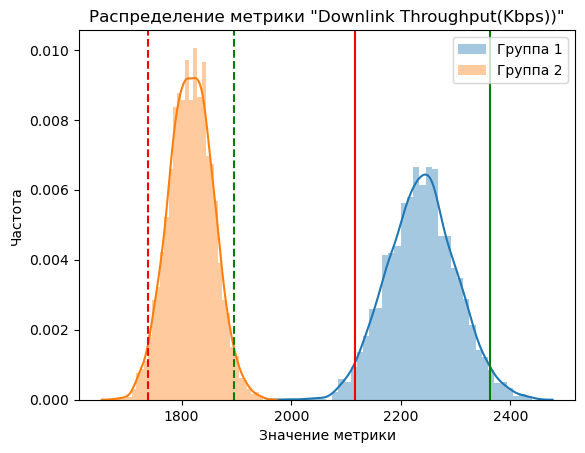

In [41]:
#Визуализируем бутсреп распределение

ax = sns.distplot(res1, label='Группа 1')
sns.distplot(res2, ax = ax, label='Группа 2')
ax.legend()
ax.axvline(np.percentile(res1,2.5),linestyle = '-',color='r')
ax.axvline(np.percentile(res1,97.5),linestyle = '-',color='g')

ax.axvline(np.percentile(res2,2.5),linestyle = '--',color='r')
ax.axvline(np.percentile(res2,97.5),linestyle = '--',color='g')

print('min =',np.percentile(res1,2.5),'max =',np.percentile(res1,97.5))
print('min =',np.percentile(res2,2.5),'max =',np.percentile(res2,97.5))

plt.title('Распределение метрики "Downlink Throughput(Kbps))"')
plt.xlabel('Значение метрики')
plt.ylabel('Частота')

plt.show()


min = -570.9210692800218 max = -273.4804955229797
p-value = 4.930577293183012e-09


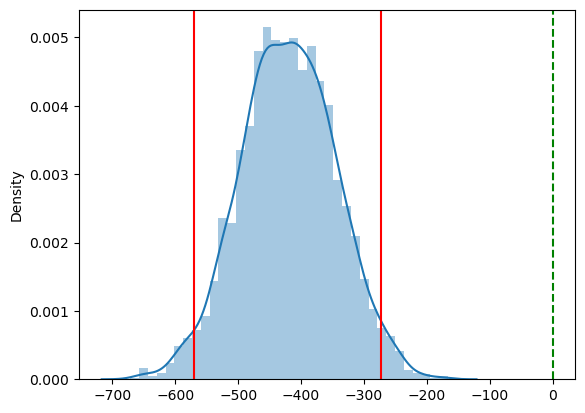

In [26]:
buf = []
N_1 = data[data['group']==1]['Downlink Throughput(Kbps)'].shape[0]
N_2 = data[data['group']==2]['Downlink Throughput(Kbps)'].shape[0]
for i in range(data.shape[0]):
    one_sample = data[data['group']==1]['Downlink Throughput(Kbps)'].sample( N_1, replace=True)
    two_sample = data[data['group']==2]['Downlink Throughput(Kbps)'].sample( N_2, replace=True)
    buf.append(np.mean(two_sample)-np.mean(one_sample))
ax_buf = sns.distplot(buf)
ax_buf.axvline(np.percentile(buf,2.5),linestyle = '-',color='r')
ax_buf.axvline(np.percentile(buf,97.5),linestyle = '-',color='r')
ax_buf.axvline(0, linestyle = '--',color='g')

print('min =',np.percentile(buf,2.5),'max =',np.percentile(buf,97.5))
print('p-value =', ttest_ind(x1, x2)[1])    

* Так как p-value < 0.05, а ноль на графике не попадает в зону распределения, то мы можем сделать вывод, что есть статистически значимые различия между рассматриваемыми вариантами.*

Значение p-value много меньше чем уровень значимости, который равен 0.05. Из этого следует, что нулевая гипотеза на имеющихся данных неверна. Противоположная ей альтернативная гипотеза говорит о том, что с 95% уверенностью при многократном повторении эксперимента мы получим тот же результат - средняя скорость передачи данных к абоненту ниже у группы недовольных клиентов.

### 1.4 Вывод

В результате анализа было выяснено, что большая часть ответивших на вопрос о качестве связи недовольна услугами. Это связано с тем что клиенты не имеющие претензий к качеству связи не желают учавствовать в данном опросе.

В статистическом тесте проверялось значение метрики скорости интернета к абоненту на удовлетворённость клиента улсугами связи.
На основе имеющихся данных можно предположить, что значения скорости интернета "к абоненту" оказывает влияние на удовлетворенность клиентов сотовой связью.
Так же метрика скорости интернет соединеия хорошо коррелирует с метрикой скорости загрузки потокового видео. То есть по метрике скорости загрузки потокового видео так же можно судить об уровне удовлетворенности абонентов от использования услуг связи.

## 2 Анализ полного интернет-трафика.

### 2.1 Постановка задачи

Улучшение качества связи необходимо не только для обеспечения надежной клиентской привлекательности, но и для увеличения прибыли. Иными словами, помегабайтовые или поминутные тарифы нуждаются в высоком качестве связи для большего использования данной услуги клиентами.

Выявив в предыдущем пункте анализа статистическое различие между группами по скорости интернет соединения, проведем исследование метрики **"Total Traffic(MB)"** для определения статистически значимой разницы между двумя группами абонентов. 

Определив данную метрику статистически значимой, можно провести, напрмер, мероприятия по корректировкам ценовой политики в соответствующих регионах в зависимости от пропускной способности сети.

### 2.2 Разведочный анализ данных

Отобразим значения данной метрики на диаграмме boxplot для визуального сравнения распределений в двух группах.

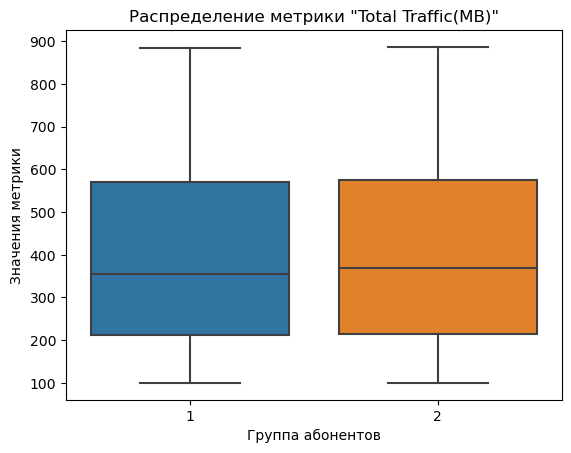

In [27]:
sns.boxplot(x='group', y='Total Traffic(MB)', data = data)
plt.title('Распределение метрики "Total Traffic(MB)"')
plt.xlabel('Группа абонентов')
plt.ylabel('Значения метрики')
plt.show()

На графике видно, что распределения практически идентичны. Так же не имеется выбросов, вероятно, по причине ограниченных тарифных планов и потребностей абонентов. Посмотрим на гистаграммы распределений.

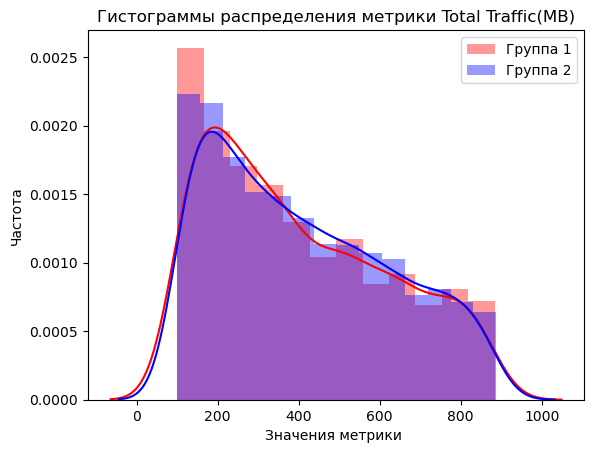

In [28]:
sns.distplot(data[data['group']==1]['Total Traffic(MB)'], color='r', label='Группа 1')
sns.distplot(data[data['group']==2]['Total Traffic(MB)'], color='b', label='Группа 2')
plt.legend()
plt.title('Гистограммы распределения метрики Total Traffic(MB)')
plt.xlabel('Значения метрики ')
plt.ylabel('Частота')
plt.show()

Распределение отличается от нормального. По графику видно, что распределения практически идентичны друг другу.

Для проверки нашего предположения об отсутствии различий применим критерий Манна-Уитни, потому как он не имеет ограничений по форме распределения данных.

### 2.3 Статистический тест

Для проведения статистического теста определим 2 гипотезы:
 - **H0**: Общий трафик не оказывает влияния на удовлетворяемость абонента сотовой связью.
 - **H1**: Общий трафик имеет статистически значимые различия между двумя группами.


In [29]:
# Вычисляем p-value

x1 = np.array(data[data['group']==1]['Total Traffic(MB)'])
x2 = np.array(data[data['group']==2]['Total Traffic(MB)'])

print('p-value =', ttest_ind(x1, x2)[1], ttest_ind(x1, x2)[1] > 0.05)

p-value = 0.39500376047905394 True


На основании имеющихся данных, и при уровне доверия 95%, у нас нет оснований отклонить нулевую гипотезу. Поэтому альтернативная гипотеза неверна.

### 2.4 Вывод

В ходе проведения статистического теста было установлено, что количество общего трафика не влияет на удовлетворенность клиентов. Более того, распределения значений практически одинаковы, т.е. клиенты с высокой и низкими скоростями интернет соединения пользуются услугами в равной мере.

## 3 Анализ частоты переотправок пакетов "к абоненту"

### 3.1 Постановка задачи

Для предоставления более качественных услуг связи попробуем определить доверительный интервал для частоты переотправок пакетов "к абоненту". \
Это позволит своевременно принимать соответствующие меры по улучшению связи в соответствующих регионах обслуживания.

### 3.2 Разведочный анализ данных

Отобразим распределение метрики между двумя группами на диаграмме boxplot:

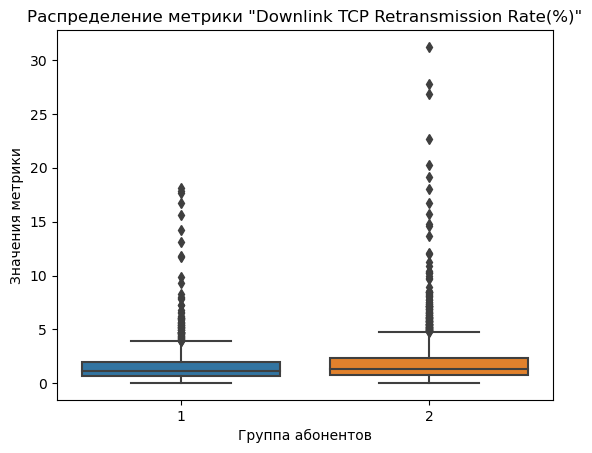

In [30]:
sns.boxplot(x='group', y='Downlink TCP Retransmission Rate(%)', data=data)
plt.title('Распределение метрики "Downlink TCP Retransmission Rate(%)"')
plt.xlabel('Группа абонентов')
plt.ylabel('Значения метрики')
plt.show()

На графике видно множество выбросов, поэтому применим правило трех сигм, так как некоторые значения выбросов на порядок больше значений в межквартильном интервале. Но не стоит забывать о том, что распределение является смещенным, поэтому выбросы, которые изображены на графике, могут ими и не являться на самом деле.

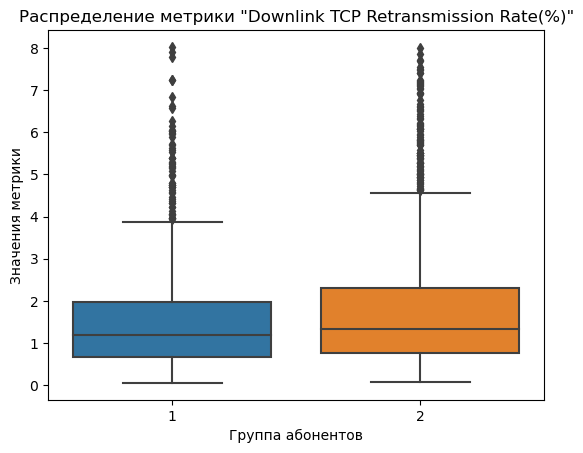

In [31]:
sns.boxplot(x='group', y='Downlink TCP Retransmission Rate(%)', data=three_sigm(data, ['Downlink TCP Retransmission Rate(%)']))
plt.title('Распределение метрики "Downlink TCP Retransmission Rate(%)"')
plt.xlabel('Группа абонентов')
plt.ylabel('Значения метрики')
plt.show()

После применения правила трёх сигм количество выбросов остается большим и судить о статистических различиях метрик на данном графике сложно. 

Отобразим метрики в виде гистограмм.

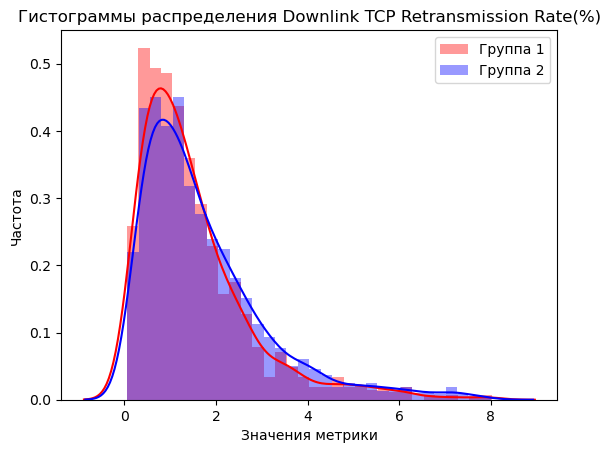

In [32]:
sns.distplot(data[data['group']==1]['Downlink TCP Retransmission Rate(%)'], color='red', label='Группа 1')
sns.distplot(data[data['group']==2]['Downlink TCP Retransmission Rate(%)'], color='blue', label='Группа 2')
plt.legend()
plt.title('Гистограммы распределения Downlink TCP Retransmission Rate(%)')
plt.xlabel('Значения метрики')
plt.ylabel('Частота')
plt.show()

Распределение имеет смещенную форму.
По графику видно, что низкая частота переотправки пакетов у первой группы встречается чаще, а высокая частота наоборот - реже.

### 3.3 Статистический тест

Для проведения статистического теста определим 2 гипотезы:
 - **H0**: Частота переотправки пакетов не оказывает влияния на удовлетворяемость абонента сотовой связью.
 - **H1**: Частота переотправки пакетов имеет статистически значимые различия между двумя группами.
 
Проверим имеют ли значения статистически значимое различие при помощи бутстрепа. Критерий Манна-Уитни здесь так же можно применить, но мы хотим сравнить медианные значения метрик и найти их доверительные интервалы.

In [33]:
# Заполним пропуски нулями

data['Downlink TCP Retransmission Rate(%)'] = data['Downlink TCP Retransmission Rate(%)'].fillna(0)

In [34]:
# Вычисляем p-value

x1 = np.array(data[data['group']==1]['Downlink TCP Retransmission Rate(%)'])
x2 = np.array(data[data['group']==2]['Downlink TCP Retransmission Rate(%)'])
from statsmodels.stats.weightstats import ttest_ind

print('p-value =', ttest_ind(x1, x2)[1], ttest_ind(x1, x2)[1] > 0.05)

p-value = 4.7303970669384305e-05 False


In [35]:
# Выполним процедуру бутстрепа на наших данных

res1 = bootstrap(data[data['group']==1]['Downlink TCP Retransmission Rate(%)'], N_TRIAL=3000)
res2 = bootstrap(data[data['group']==2]['Downlink TCP Retransmission Rate(%)'], N_TRIAL=3000)

min = 1.4258355627306274 max = 1.5816395295202952
min = 1.6488785460992905 max = 1.7703140830800406


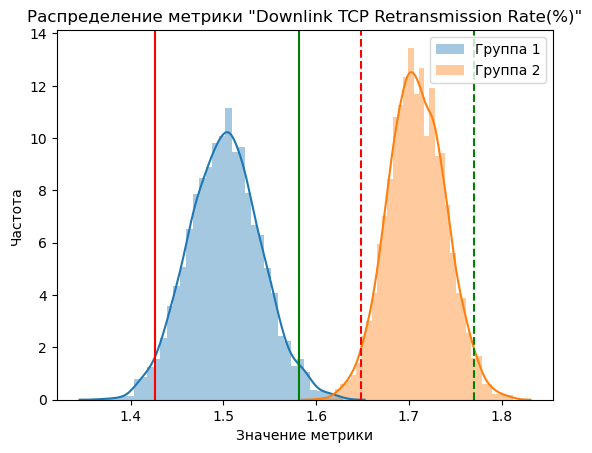

In [36]:
#Визуализируем бутсреп распределение

ax = sns.distplot(res1, label='Группа 1')
sns.distplot(res2,ax = ax, label='Группа 2')
ax.legend()
ax.axvline(np.percentile(res1,2.5),linestyle = '-',color='r')
ax.axvline(np.percentile(res1,97.5),linestyle = '-',color='g')

ax.axvline(np.percentile(res2,2.5),linestyle = '--',color='r')
ax.axvline(np.percentile(res2,97.5),linestyle = '--',color='g')

plt.title('Распределение метрики "Downlink TCP Retransmission Rate(%)"')
plt.xlabel('Значение метрики')
plt.ylabel('Частота')

print('min =',np.percentile(res1,2.5),'max =',np.percentile(res1,97.5))
print('min =',np.percentile(res2,2.5),'max =',np.percentile(res2,97.5))

plt.show()

min = 0.11387801895116208 max = 0.3012531850869419
p-value = 4.7303970669384305e-05


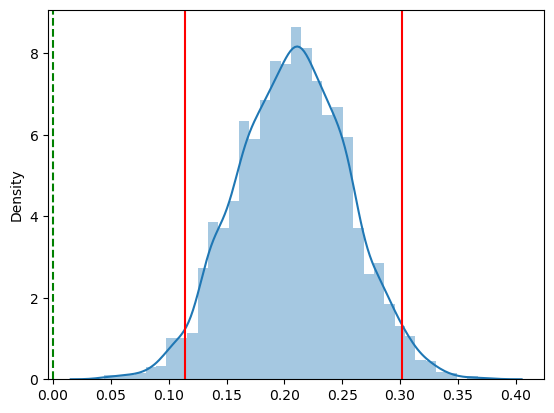

In [37]:
buf = []
N_1 = data[data['group']==1]['Downlink TCP Retransmission Rate(%)'].shape[0]
N_2 = data[data['group']==2]['Downlink TCP Retransmission Rate(%)'].shape[0]

for i in range(data.shape[0]):
    one_sample = data[data['group']==1]['Downlink TCP Retransmission Rate(%)'].sample(N_1, replace=True)
    two_sample = data[data['group']==2]['Downlink TCP Retransmission Rate(%)'].sample(N_2, replace=True)
    buf.append(np.mean(two_sample)-np.mean(one_sample))
    
ax_buf = sns.distplot(buf)
ax_buf.axvline(np.percentile(buf,2.5),linestyle = '-',color='r')
ax_buf.axvline(np.percentile(buf,97.5),linestyle = '-',color='r')
ax_buf.axvline(0, linestyle = '--',color='g')

print('min =',np.percentile(buf,2.5),'max =',np.percentile(buf,97.5))
print('p-value =', ttest_ind(x1, x2)[1])

Значение p-value на имеющихся данных позволяет отклонить нулевую гипотезу об отсутствии статистически значимом различии между распределениями.

### 3.4 Вывод



Различия между значениями частоты переотправки пакетов статистически значимы. С вероятностью 95%, на основе имеющихся данных, можно предположить, что среднее значение для первой группы абонентов лежит в интервале от около 1,43 до приблизительно 1,58, для второй группы от около 1,65 до приблизительно 1,77. Как видим, частота переотправки пакетов для второй группы выше чем для первой.

## 4 Анализ ответов на второй вопрос

### 4.1 Постановка задачи

Проведем анализ ответов на второй вопрос с целью определения статистической значимости между распределениями, которые обусловлены ответами, касающимися качества звонков. Это необходимо для определения метрики качетсва, на основании значений которой можно будет предполагать о качетсве связи телефонных вызовов.

### 4.2 Разведочный анализ данных

Проанализируем столбец с ответами на второй вопрос.

In [38]:
data[data['group']==2]['Q2'].describe()

count     1974
unique      52
top          0
freq       659
Name: Q2, dtype: int64

Видим, что имеется 52 уникальных значения, чаще всего абоненты предпочитают не отвечать на второй вопрос.

Дополним датасет столбцами с категорями ответов и разметим соответствия.

In [39]:
# Заполним пропущенные значения нулями

data['Q2'].fillna(0, inplace=True)

In [40]:
# Список с типом жалоб
complain_list = ['bad_call', 'long_time_call', 'bad_cellular_in_build', 
                 'slovly_internet', 'slovly_download_video', 'none_answer']

# Добавим столбцы с соответствующей жалобой в датасет и 
# промаркеруем если она присутствует в списке с ответами

for i, complain in enumerate(complain_list):
    i = i+1
    if i < 6:
        data[complain] = data['Q2'].apply(
            lambda x: 1 if str(i) in str(x) else 0
            )

    # В вариантах без ответа добавим случаи если присутствует ноль 
    if i == 6:
        data[complain] = data['Q2'].apply(
            lambda x: 1 if str(i) in str(x) or str(0) in str(x) else 0
            )

# Добавим столбец прочее если ни одно из вышеописанных условий не выполнилось

data['other'] = [0 if x==True else 1 for x in data[complain_list].any(axis=1)]

complain_list.append('other')

Изобразим соотношение категорий ответов на второй вопрос в виде круговой диаграммы.

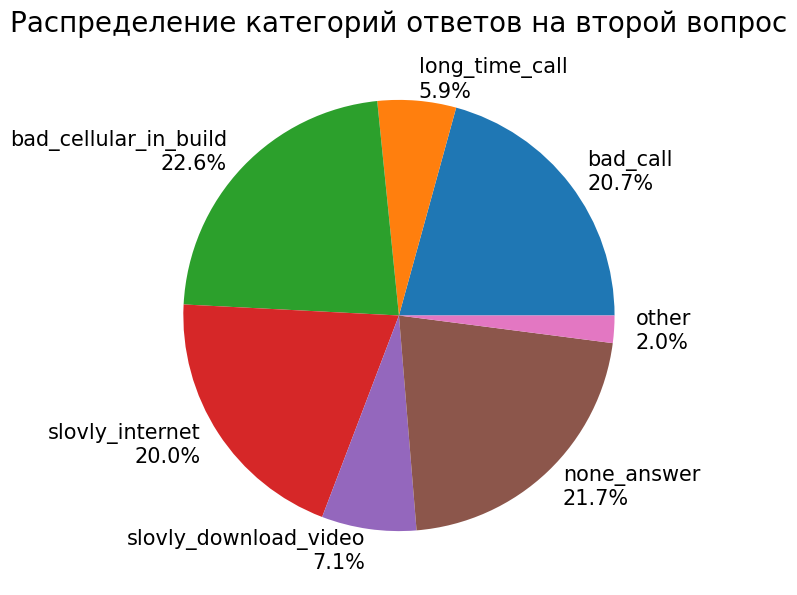

In [41]:
# К подписям секторов добавим процентное значение количества ответов из
# данной категории

labels_list = [
    complain + '\n' + str(round(
        data[data['group'] == 2][complain].sum() / (
        data[data['group'] == 2][complain_list].sum().sum()
        )*100, 1)) + '%' for complain in complain_list
]

fig = plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})

plt.pie(data[data['group'] == 2][complain_list].sum(), labels=labels_list)
plt.title('Распределение категорий ответов на второй вопрос', loc='center', verticalalignment='bottom', fontsize=20)
plt.show()

Наиболее часто встречающиеся ответы на второй вопрос:
- Плохая связь в зданиях;
- Недозвоны, обрывы при звонках;
- Медленный интернет.

Также предпочитают не отвечать на второй вопрос около 21 %. 


Посмотрим на корелляцию вариантов ответов с метриками качества связи.

In [42]:
# Список названий столбцов с метриками качества связи
base_list_metrics = ['Total Traffic(MB)', 'Downlink Throughput(Kbps)', 
                     'Uplink Throughput(Kbps)', 
                     'Downlink TCP Retransmission Rate(%)', 
                     'Video Streaming Download Throughput(Kbps)',
                     'Video Streaming xKB Start Delay(ms)',
                     'Web Page Download Throughput(Kbps)', 
                     'Web Average TCP RTT(ms)']

# Добавим столбцы с названиями вариантов ответов на второй вопрос в копию списка
list_for_corr = base_list_metrics.copy()

for complain in complain_list:
    list_for_corr.append(complain)

# Создаем корреляционную таблицу
data[data['group']==2][list_for_corr].corr()[complain_list].loc[base_list_metrics,:]

,bad_call,long_time_call,bad_cellular_in_build,slovly_internet,slovly_download_video,none_answer,other
Total Traffic(MB),-0.025502,-0.024824,-0.013021,0.020586,0.020727,0.002988,-0.022603
Downlink Throughput(Kbps),0.021592,-0.028439,-0.008222,-0.081371,-0.066833,-0.003233,-0.010808
Uplink Throughput(Kbps),0.010526,-0.003161,-0.023388,-0.051966,-0.057197,0.008637,0.019562
Downlink TCP Retransmission Rate(%),0.015503,0.030188,0.050278,0.086939,0.059590,-0.032706,-0.007952
Video Streaming Download Throughput(Kbps),0.040789,0.010984,-0.026958,-0.126522,-0.103644,-0.001909,0.012465
Video Streaming xKB Start Delay(ms),0.047102,-0.011304,0.003913,0.095083,0.018617,-0.052095,-0.004542
Web Page Download Throughput(Kbps),0.055415,-0.022969,0.007941,-0.055519,-0.078547,-0.026731,0.008483
Web Average TCP RTT(ms),-0.013102,0.023641,-0.003843,0.125541,0.083239,-0.042264,0.019374


Метрики, которые связаны с качеством звонков не имеют корреляционной связи с метриками качества. Среди прочих выделяются только вариантый ответов "медленное интернет соединение" и "медленная загрузка видео". Корреляционная связь слабая, но всё же имеется. Проверим статистические различия метрики **"Web Page Download Throughput(Kbps)"** внутри второй группы абонентов в рамках варианта ответа "Недозвоны, обрывы при звонках".

Отобразим распределение метрики между двумя группами на диаграмме boxplot:

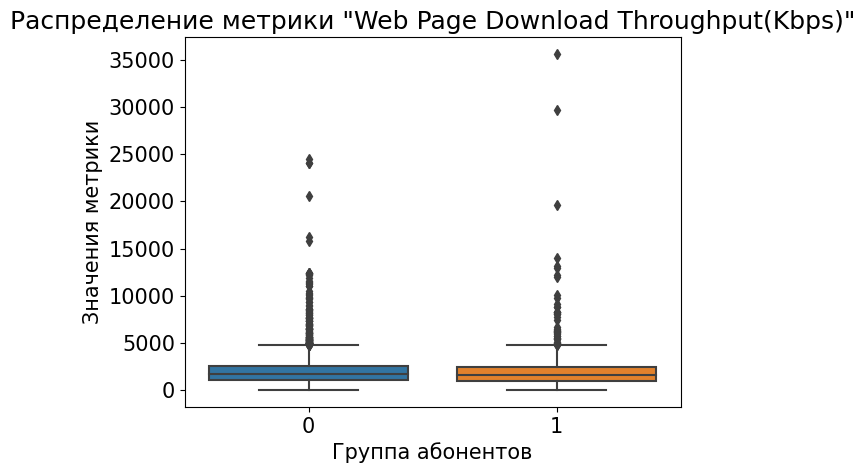

In [43]:
sns.boxplot(x='bad_call', y='Web Page Download Throughput(Kbps)', data=data)
plt.title('Распределение метрики "Web Page Download Throughput(Kbps)"')
plt.xlabel('Группа абонентов')
plt.ylabel('Значения метрики')
plt.show()

На графике видно множество выбросов, поэтому применим правило трех сигм, так как некоторые значения выбросов на порядок больше значений в межквартильном интервале. Но не стоит забывать о том, что распределение является смещенным, поэтому выбросы, которые изображены на графике, могут ими и не являться на самом деле.

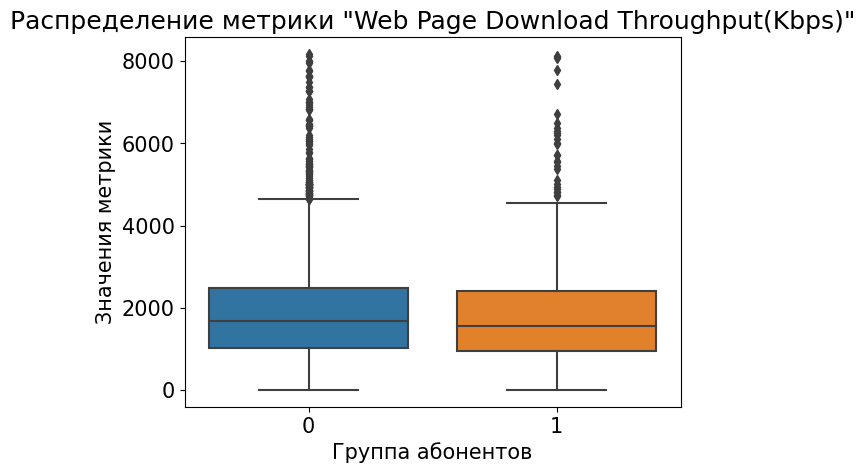

In [44]:
sns.boxplot(x='bad_call', y='Web Page Download Throughput(Kbps)', data=three_sigm(data, ['Web Page Download Throughput(Kbps)']))
plt.title('Распределение метрики "Web Page Download Throughput(Kbps)"')
plt.xlabel('Группа абонентов')
plt.ylabel('Значения метрики')
plt.show()

После применения правила трёх сигм количество выбросов остается большим и судить о статистических различиях метрик на данном графике сложно. 

Отобразим метрики в виде гистограмм.

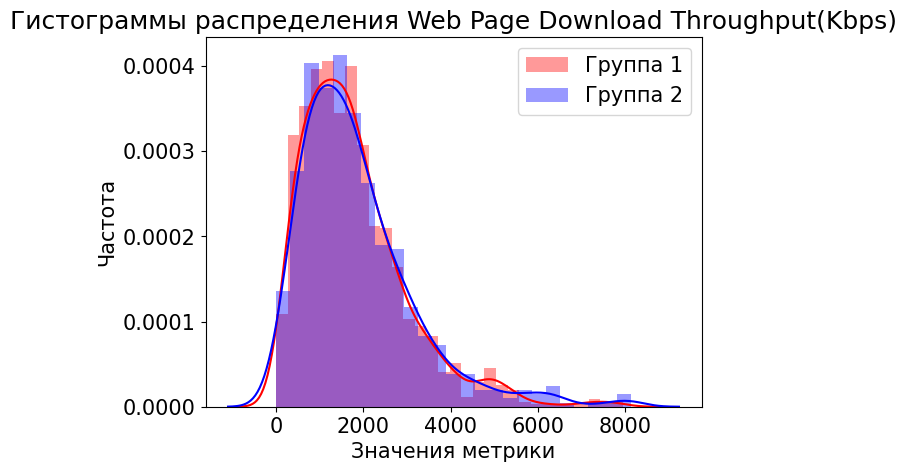

In [45]:
sns.distplot(data[(data['group']==2) & (data['bad_call']==0)]['Web Page Download Throughput(Kbps)'], color='red', label='Группа 1')
sns.distplot(data[(data['group']==2) & (data['bad_call']==1)]['Web Page Download Throughput(Kbps)'], color='blue', label='Группа 2')
plt.legend()
plt.title('Гистограммы распределения Web Page Download Throughput(Kbps)')
plt.xlabel('Значения метрики')
plt.ylabel('Частота')
plt.show()

Распределение имеет смещенную форму.
По графику видно, что значение метрики скорости загрузки веб страниц практически идентично между группами. Проверим наше предположение об отсутствиии статистически значимых различий между группами абонентов в рамках данной метрики.

### 4.3 Статичтический тест

Для проведения статистического теста определим 2 гипотезы:
 - **H0**: Скорость загрузки веб-страниц не оказывает влияния на качество звонков.
 - **H1**: Скорость загрузки веб-страниц оказывает влияние на качество звонков.
 


In [46]:
# Заполним пропущенные данные нулями

data['Web Page Download Throughput(Kbps)'].fillna(0, inplace=True)

In [47]:
# Вычисляем p-value

x1 = np.array(data[(data['group']==2) & (data['bad_call']==0)]['Web Page Download Throughput(Kbps)'].dropna())
x2 = np.array(data[(data['group']==2) & (data['bad_call']==1)]['Web Page Download Throughput(Kbps)'].dropna())

print('p-value =', ttest_ind(x1, x2)[1], ttest_ind(x1, x2)[1] > 0.05)

p-value = 0.43401177383170353 True


На основании имеющихся данных, и при уровне доверия 95%, у нас нет оснований отклонить нулевую гипотезу. Поэтому альтернативная гипотеза неверна. Удостоверимся в этом при помощи бутстрепа.

In [48]:
# Выполним процедуру бутстрепа на наших данных

res1 = bootstrap(data[(data['group']==2) & (data['bad_call']==0)]['Web Page Download Throughput(Kbps)'].dropna(), N_TRIAL=3000)
res2 = bootstrap(data[(data['group']==2) & (data['bad_call']==1)]['Web Page Download Throughput(Kbps)'].dropna(), N_TRIAL=3000)

min = 1695.5364734162893 max = 1836.6818640648567
min = 1711.6810875771607 max = 1914.2629583333335


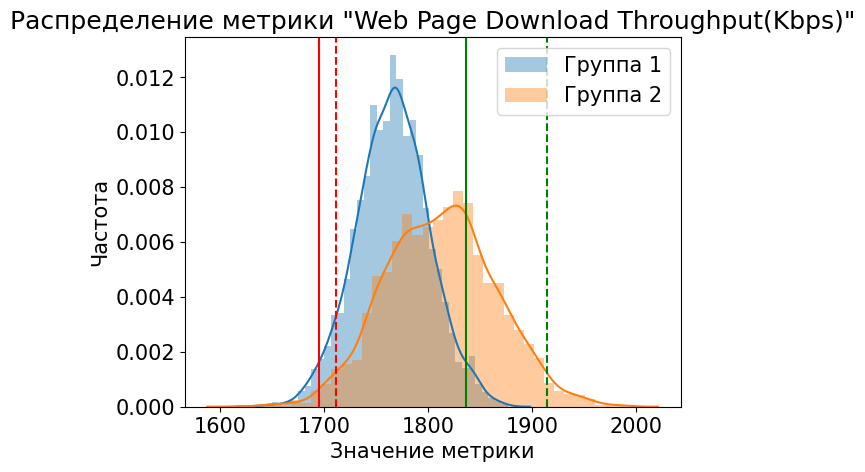

In [49]:
#Визуализируем бутсреп распределение

ax = sns.distplot(res1, label='Группа 1')
sns.distplot(res2,ax = ax, label='Группа 2')
ax.legend()
ax.axvline(np.percentile(res1,2.5),linestyle = '-',color='r')
ax.axvline(np.percentile(res1,97.5),linestyle = '-',color='g')

ax.axvline(np.percentile(res2,2.5),linestyle = '--',color='r')
ax.axvline(np.percentile(res2,97.5),linestyle = '--',color='g')

plt.title('Распределение метрики "Web Page Download Throughput(Kbps)"')
plt.xlabel('Значение метрики')
plt.ylabel('Частота')

print('min =',np.percentile(res1,2.5),'max =',np.percentile(res1,97.5))
print('min =',np.percentile(res2,2.5),'max =',np.percentile(res2,97.5))

plt.show()

min = -76.08454847669141 max = 168.54796860859744
p-value = 0.43401177383170353


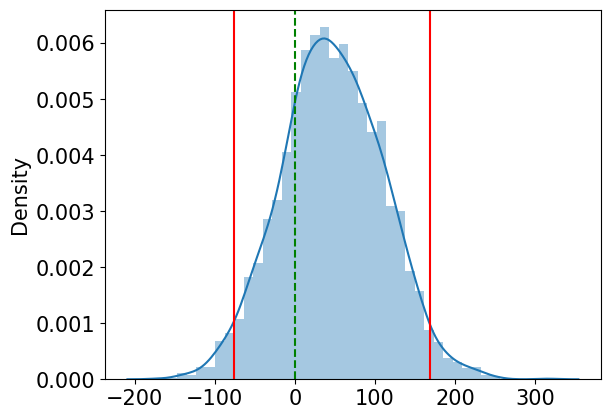

In [50]:
buf = []
N_1 = data[(data['group']==2) & (data['bad_call']==0)]['Web Page Download Throughput(Kbps)'].shape[0]
N_2 = data[(data['group']==2) & (data['bad_call']==1)]['Web Page Download Throughput(Kbps)'].shape[0]

for i in range(data.shape[0]):
    one_sample = data[(data['group']==2) & (data['bad_call']==0)]['Web Page Download Throughput(Kbps)'].sample(N_1, replace=True)
    two_sample = data[(data['group']==2) & (data['bad_call']==1)]['Web Page Download Throughput(Kbps)'].sample(N_2, replace=True)
    buf.append(np.mean(two_sample)-np.mean(one_sample))
    
ax_buf = sns.distplot(buf)
ax_buf.axvline(np.percentile(buf,2.5),linestyle = '-',color='r')
ax_buf.axvline(np.percentile(buf,97.5),linestyle = '-',color='r')
ax_buf.axvline(0, linestyle = '--',color='g')

print('min =',np.percentile(buf,2.5),'max =',np.percentile(buf,97.5))
print('p-value =', ttest_ind(x1, x2)[1])

* Так как ноль на графике попадает в зону распределения, статистически значимых различий метрики между группами абонентов нет.

### 4.4 Вывод

Проведя анализ ответов на второй вопрос, мы вяснили, что у абоненты в равной степени жалуются на плохую связь в зданиях, недозвоны и обрывы при звонках.

Статистический тест не выявил значимой разницы метрики скорости загрузки веб-страниц и качеством вызовов. Вероятно это связано с тем что при возникших проблемах со связью у абонентов, оценивающих связь баллом ниже 9, метрики качества имеют примерно одинаково низкий уровень в независимости от качества звонков.

## 5 Общий вывод по проведённой работе

В результате анализа было выяснено, что большая часть ответивших на вопрос о качестве связи недовольна услугами. Это связано с тем что клиенты не имеющие претензий к качеству связи не желают учавствовать в данном опросе.

На основе имеющихся данных можно предположить, что значения скорости интернета "к абоненту" оказывает статистически значимое влияние на удовлетворенность клиентов сотовой связью. Так же метрика скорости интернет соединеия хорошо коррелирует с метрикой скорости загрузки потокового видео. То есть по значениям скорости загрузки потокового видео так же можно судить об уровне удовлетворенности абонентов от использования услуг связи.

Так же было обнаружено статистически значимое различие значения частоты переотправки пакетов. С вероятностью 95%, на основе имеющихся данных, можно предположить, что среднее значение для первой группы абонентов лежит в интервале от около 1,43 до приблизительно 1,58, для второй группы от около 1,65 до приблизительно 1,77. Эти данные можно использовать как ориентировочные значения метрики для проведения соответствующих мер по улучшению качества связи.

В ходе проведения статистического теста было установлено, что количество общего трафика не влияет на удовлетворенность клиентов.

Проведя анализ ответов на второй вопрос, выяснилось, что абоненты в равной степени жалуются на плохую связь в зданиях, недозвоны и обрывы при звонках.

Статистический тест не выявил значимой разницы метрики скорости загрузки веб-страниц и качеством вызовов. Вероятно это связано с тем что при возникших проблемах со связью у абонентов, оценивающих связь баллом ниже 9, метрики качества имеют примерно одинаково низкий уровень в независимости от качества звонков. 

Для удобства опросов абонентов возможно лучшим вариантом было бы сократить количество вопросов о качестве связи. Хорошая корреляционная связь между метриками скорости интернет соединения и скорости загрузки потокового видео позволяет сократить количество вариантов ответов на второй вопрос: "Медленный мобильный Интернет" и "Медленная загрузка видео" можно объединить в один, например, "Медленный мобильный Интернет".